In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
data = pd.read_csv("upwork.csv")
data.head()

,date dd.mm.yyyy,number
0,28.11.2020,2 13 27 28 35 47
1,05.12.2020,4 7 8 14 33 47
2,12.12.2020,11 13 19 20 27 30
3,19.12.2020,9 32 33 34 38 43
4,26.12.2020,9 18 24 37 40 45


In [3]:
data.columns = ["Date", "Number"]

In [4]:
data.head()

,Date,Number
0,28.11.2020,2 13 27 28 35 47
1,05.12.2020,4 7 8 14 33 47
2,12.12.2020,11 13 19 20 27 30
3,19.12.2020,9 32 33 34 38 43
4,26.12.2020,9 18 24 37 40 45


In [5]:
data.tail()

,Date,Number
77,21.05.2022,1 24 29 31 46
78,28.05.2022,5 10 14 33 37
79,04.06.2022,6 11 13 17 19
80,11.06.2022,6 22 23 39 48
81,18.06.2022,6 18 28 38 42


In [6]:
df1 = data.copy()

In [7]:
df1.Date = pd.to_datetime(df1.Date)
df1.head()

,Date,Number
0,2020-11-28,2 13 27 28 35 47
1,2020-05-12,4 7 8 14 33 47
2,2020-12-12,11 13 19 20 27 30
3,2020-12-19,9 32 33 34 38 43
4,2020-12-26,9 18 24 37 40 45


In [8]:
df2 = df1.copy()

In [9]:
df2.set_index(df2.Date, inplace=True)
df2.head()

,Date,Number
Date,,
2020-11-28,2020-11-28,2 13 27 28 35 47
2020-05-12,2020-05-12,4 7 8 14 33 47
2020-12-12,2020-12-12,11 13 19 20 27 30
2020-12-19,2020-12-19,9 32 33 34 38 43
2020-12-26,2020-12-26,9 18 24 37 40 45


In [10]:
df3 = df2.drop("Date", axis="columns")
df3.head()

,Number
Date,
2020-11-28,2 13 27 28 35 47
2020-05-12,4 7 8 14 33 47
2020-12-12,11 13 19 20 27 30
2020-12-19,9 32 33 34 38 43
2020-12-26,9 18 24 37 40 45


In [11]:
df3.iloc[49, :]

Number    4 26 36 37 38
Name: 2021-06-11 00:00:00, dtype: object

In [12]:
len(df3)

82

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2020-11-28 to 2022-06-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  82 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [14]:
df3.describe()

,Number
count,82
unique,81
top,6 22 23 39 48
freq,2


In [15]:
df4 = df3.copy()
df4.tail()

,Number
Date,
2022-05-21,1 24 29 31 46
2022-05-28,5 10 14 33 37
2022-04-06,6 11 13 17 19
2022-11-06,6 22 23 39 48
2022-06-18,6 18 28 38 42


In [16]:
df5 = df4.iloc[:-1, :]
df5.tail()

,Number
Date,
2022-11-06,6 22 23 39 48
2022-05-21,1 24 29 31 46
2022-05-28,5 10 14 33 37
2022-04-06,6 11 13 17 19
2022-11-06,6 22 23 39 48


In [17]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
for i in range(len(df5)):
    val = df5.iloc[i, :].values[0].split(" ")
#     print(i)
    col1.append(int(val[0]))
    col2.append(int(val[1]))
    col3.append(int(val[2]))
    col4.append(int(val[3]))
    col5.append(int(val[4]))
    if len(val)>5:
        col6.append(int(val[5]))
    elif len(val)==5:
        col6.append(0)
    

In [18]:
df6 = df5.copy()

In [19]:
df6["Number1"] = col1
df6["Number2"] = col2
df6["Number3"] = col3
df6["Number4"] = col4
df6["Number5"] = col5
df6["Number6"] = col6

In [20]:
df6.head()

,Number,Number1,Number2,Number3,Number4,Number5,Number6
Date,,,,,,,
2020-11-28,2 13 27 28 35 47,2,13,27,28,35,47
2020-05-12,4 7 8 14 33 47,4,7,8,14,33,47
2020-12-12,11 13 19 20 27 30,11,13,19,20,27,30
2020-12-19,9 32 33 34 38 43,9,32,33,34,38,43
2020-12-26,9 18 24 37 40 45,9,18,24,37,40,45


In [21]:
df7 = df6.copy()

In [22]:
df7 = df7.drop("Number", axis="columns")
df7.head()

,Number1,Number2,Number3,Number4,Number5,Number6
Date,,,,,,
2020-11-28,2,13,27,28,35,47
2020-05-12,4,7,8,14,33,47
2020-12-12,11,13,19,20,27,30
2020-12-19,9,32,33,34,38,43
2020-12-26,9,18,24,37,40,45


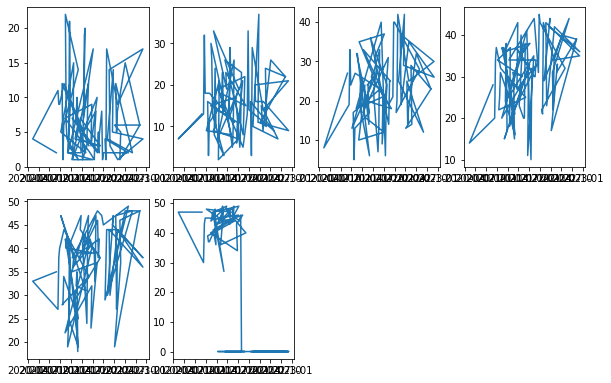

In [23]:
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 4, i+1)
    plt.plot(df7[f"Number{i+1}"])

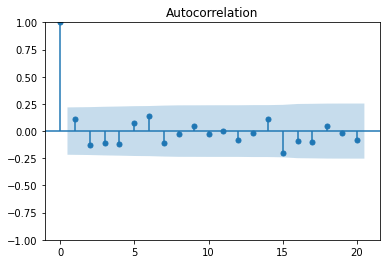

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df7.Number1);

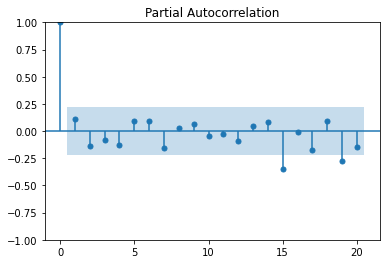

In [25]:
import warnings
warnings.filterwarnings("ignore")
plot_pacf(df7.Number1);

In [26]:
train = df7[:-8]
test = df7[-8:]

<AxesSubplot:xlabel='Date'>

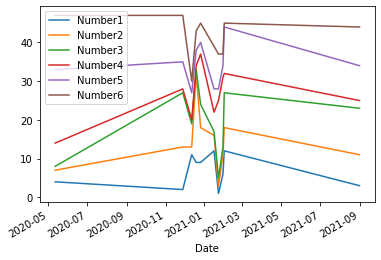

In [27]:
df7.iloc[:10, :].plot()

In [28]:
df8 = df7.sort_index()
df8.head(10)

,Number1,Number2,Number3,Number4,Number5,Number6
Date,,,,,,
2020-05-12,4,7,8,14,33,47
2020-11-28,2,13,27,28,35,47
2020-12-12,11,13,19,20,27,30
2020-12-19,9,32,33,34,38,43
2020-12-26,9,18,24,37,40,45
2021-01-05,5,9,13,34,47,48
2021-01-16,12,16,17,22,28,39
2021-01-23,1,3,5,25,28,37
2021-01-30,6,11,13,31,34,37


In [29]:
df8.shift(2)

,Number1,Number2,Number3,Number4,Number5,Number6
Date,,,,,,
2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-12,4.0,7.0,8.0,14.0,33.0,47.0
2020-12-19,2.0,13.0,27.0,28.0,35.0,47.0
2020-12-26,11.0,13.0,19.0,20.0,27.0,30.0
...,...,...,...,...,...,...
2022-09-04,15.0,26.0,32.0,40.0,48.0,0.0
2022-11-06,2.0,9.0,28.0,32.0,49.0,0.0
2022-11-06,2.0,7.0,12.0,44.0,48.0,0.0


In [30]:
x = df8.iloc[2:, :]
y = df8.shift(2).iloc[2:, :]

In [31]:
model = sm.tsa.arima.ARIMA(df8.Number1, order=(1, 1, 1))

In [32]:
model_fit = model.fit()

In [33]:
new_value = model_fit.forecast(steps=8)
new_value.iloc[0:]

81    6.956092
82    6.729384
83    6.746771
84    6.745437
85    6.745540
86    6.745532
87    6.745532
88    6.745532
Name: predicted_mean, dtype: float64

In [34]:
for i in new_value:
    print(i)

6.956091736303821
6.729384058040164
6.746770653575241
6.745437246137894
6.745539507410975
6.745531664820872
6.74553226628238
6.745532220155279


In [35]:
len(df8)

81

In [36]:
def split(df8):
    x_train = df8[:-7]
    x_test = df8[-7:]
    return x_train, x_test
    

In [37]:
x_train, x_test = split(df8)

In [38]:
def model(x_train, x_test, order):
    model = sm.tsa.arima.ARIMA(x_train, order=order)
    model_fit = model.fit()
    from sklearn.metrics import mean_squared_error
    loss = np.sqrt(mean_squared_error(x_test, model_fit.forecast(steps=len(x_test))))
    print(loss)
    return model, loss, order    

In [39]:
model(x_train.Number1, x_test.Number1, order=(1, 1, 1))

5.6830914124360055


(<statsmodels.tsa.arima.model.ARIMA at 0x24b41592a60>,
 5.6830914124360055,
 (1, 1, 1))

In [40]:
len(x_train.Number1)

74

In [41]:
def loss(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    import numpy as np
    return (np.sqrt(mean_squared_error(y_true, y_pred)))

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
train_df, test_df = split(df8)

<AxesSubplot:xlabel='Date'>

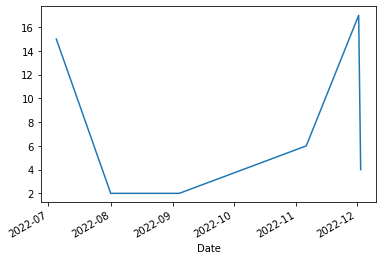

In [44]:
test_df.Number1.plot()

In [45]:
model = ARIMA(train_df.Number1, order=(3, 0, 0))
model_fit = model.fit()
y_predicted = model_fit.forecast(steps=7)
y_pred = [i for i in y_predicted]

In [46]:
dataframe = test_df.Number1
dataframe

Date
2022-07-05    15
2022-08-01     2
2022-09-04     2
2022-11-06     6
2022-11-06     6
2022-12-02    17
2022-12-03     4
Name: Number1, dtype: int64

In [47]:
dataf = pd.DataFrame(dataframe)

In [48]:
dataf["forecast"] = y_pred
dataf

,Number1,forecast
Date,,
2022-07-05,15,8.189598
2022-08-01,2,7.665879
2022-09-04,2,6.829257
2022-11-06,6,6.399976
2022-11-06,6,6.577603
2022-12-02,17,6.731268
2022-12-03,4,6.778601


<AxesSubplot:xlabel='Date'>

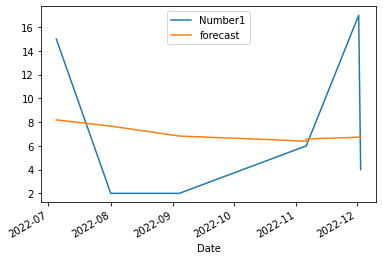

In [49]:
dataf.plot()

# Number1 

In [50]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(x_train.Number1, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(x_test.Number1))
            y_predicted = [i for i in y_pred]
            losses = loss(x_test.Number1, y_predicted)
            print(f"Loss : {losses} | order : {order}")
            
        
                
                

Loss : 5.703160807787242 | order : (0, 0, 0)
Loss : 5.667376868811984 | order : (0, 0, 1)
Loss : 5.551860096760272 | order : (0, 0, 2)
Loss : 5.658137313184975 | order : (0, 0, 3)
Loss : 5.854505238750315 | order : (0, 0, 4)
Loss : 6.152815847816579 | order : (0, 1, 0)
Loss : 5.703164888450939 | order : (0, 1, 1)
Loss : 5.676574676271613 | order : (0, 1, 2)
Loss : 5.5902942518782845 | order : (0, 1, 3)
Loss : 5.672503288514253 | order : (0, 1, 4)
Loss : 16.70329308850051 | order : (0, 2, 0)
Loss : 6.131155606616285 | order : (0, 2, 1)
Loss : 5.9961907112981425 | order : (0, 2, 2)
Loss : 5.986486107897698 | order : (0, 2, 3)
Loss : 5.9194047907460705 | order : (0, 2, 4)
Loss : 75.98590094785132 | order : (0, 3, 0)
Loss : 17.863267058100984 | order : (0, 3, 1)
Loss : 6.191442555924032 | order : (0, 3, 2)
Loss : 5.7489992273419315 | order : (0, 3, 3)
Loss : 5.745111414179554 | order : (0, 3, 4)
Loss : 91.68346166488251 | order : (0, 4, 0)
Loss : 72.04453361847146 | order : (0, 4, 1)
Loss 

In [51]:
#3, 0, 0

In [52]:
model_for_number1 = ARIMA(df8.Number1, order=(3, 0, 0))
model_fit = model_for_number1.fit()

In [53]:
y_pred_number1 = model_fit.forecast(steps=3)
y_pred_number1

81    6.151313
82    5.160422
83    7.485227
Name: predicted_mean, dtype: float64

# Number 2

In [68]:
train_df, test_df = split(df8)

In [55]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(train_df.Number2, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(test_df.Number2))
            y_predicted = [i for i in y_pred]
            losses = loss(test_df.Number2, y_predicted)
            print(f"Loss : {losses} | order : {order}")
    

Loss : 7.382882224921102 | order : (0, 0, 0)
Loss : 7.223157262821984 | order : (0, 0, 1)
Loss : 7.443406320534493 | order : (0, 0, 2)
Loss : 7.250248852967603 | order : (0, 0, 3)
Loss : 7.2747113153419285 | order : (0, 0, 4)
Loss : 9.82707629823991 | order : (0, 1, 0)
Loss : 7.382883320768809 | order : (0, 1, 1)
Loss : 7.233781579491433 | order : (0, 1, 2)
Loss : 7.419453103171772 | order : (0, 1, 3)
Loss : 7.242251965646714 | order : (0, 1, 4)
Loss : 68.58987847029952 | order : (0, 2, 0)
Loss : 9.725750232825717 | order : (0, 2, 1)
Loss : 7.453471815540659 | order : (0, 2, 2)
Loss : 7.342323491206151 | order : (0, 2, 3)
Loss : 7.46832959182711 | order : (0, 2, 4)
Loss : 398.55094673434536 | order : (0, 3, 0)
Loss : 72.63215237075423 | order : (0, 3, 1)
Loss : 11.782975077883835 | order : (0, 3, 2)
Loss : 7.3951243022515545 | order : (0, 3, 3)
Loss : 7.216539749617442 | order : (0, 3, 4)
Loss : 1550.0435016936847 | order : (0, 4, 0)
Loss : 407.7973170305388 | order : (0, 4, 1)
Loss : 

In [56]:
#2, 1, 3

In [69]:
model_for_number2 = ARIMA(df8.Number2, order=(2,1,3))
model_fit = model_for_number2.fit()
y_pred_number2 = model_fit.forecast(steps=3)
y_pred_number2

81    17.720960
82    15.709797
83    13.441321
Name: predicted_mean, dtype: float64

# Number3

In [58]:
train_df, test_df = split(df8)

In [59]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(train_df.Number3, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(test_df.Number3))
            y_predicted = [i for i in y_pred]
            losses = loss(test_df.Number3, y_predicted)
            print(f"Loss : {losses} | order : {order}")

Loss : 6.353888588053547 | order : (0, 0, 0)
Loss : 6.195581820786444 | order : (0, 0, 1)
Loss : 6.193679096089617 | order : (0, 0, 2)
Loss : 7.335198427022677 | order : (0, 0, 3)
Loss : 7.1791196354631674 | order : (0, 0, 4)
Loss : 12.45563555756418 | order : (0, 1, 0)
Loss : 6.192208368427213 | order : (0, 1, 1)
Loss : 5.983657969716826 | order : (0, 1, 2)
Loss : 5.985908206297234 | order : (0, 1, 3)
Loss : 7.128889388536493 | order : (0, 1, 4)
Loss : 77.10475249387265 | order : (0, 2, 0)
Loss : 12.175185263244275 | order : (0, 2, 1)
Loss : 6.2649260823853465 | order : (0, 2, 2)
Loss : 6.137647334015155 | order : (0, 2, 3)
Loss : 6.140916528812114 | order : (0, 2, 4)
Loss : 211.33656299169417 | order : (0, 3, 0)
Loss : 84.01319365197098 | order : (0, 3, 1)
Loss : 17.717148351038844 | order : (0, 3, 2)
Loss : 6.482099969339064 | order : (0, 3, 3)
Loss : 6.349382061101469 | order : (0, 3, 4)
Loss : 94.27164397178298 | order : (0, 4, 0)
Loss : 201.52680250347356 | order : (0, 4, 1)
Loss

In [60]:
#1, 2, 4

In [70]:
model_for_number3 = ARIMA(df8.Number3, order=(1,2,4))
model_fit = model_for_number3.fit()
y_pred_number3 = model_fit.forecast(steps=3)
y_pred_number3

81    27.640214
82    24.762917
83    27.834391
Name: predicted_mean, dtype: float64

# Number4

In [62]:
train_df, test_df = split(df8)

In [63]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(train_df.Number4, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(test_df.Number4))
            y_predicted = [i for i in y_pred]
            losses = loss(test_df.Number4, y_predicted)
            print(f"Loss : {losses} | order : {order}")

Loss : 8.63146532282433 | order : (0, 0, 0)
Loss : 8.691712953701305 | order : (0, 0, 1)
Loss : 8.657352610585814 | order : (0, 0, 2)
Loss : 9.165156258699223 | order : (0, 0, 3)
Loss : 8.948155933080937 | order : (0, 0, 4)
Loss : 6.047431568147635 | order : (0, 1, 0)
Loss : 7.026517409150332 | order : (0, 1, 1)
Loss : 6.6225673226289254 | order : (0, 1, 2)
Loss : 6.609900479702599 | order : (0, 1, 3)
Loss : 6.821352191744101 | order : (0, 1, 4)
Loss : 6.718843437881739 | order : (0, 2, 0)
Loss : 5.3514388607105445 | order : (0, 2, 1)
Loss : 5.106039413767448 | order : (0, 2, 2)
Loss : 5.3790970931428435 | order : (0, 2, 3)
Loss : 5.3411782088411695 | order : (0, 2, 4)
Loss : 201.80188304373272 | order : (0, 3, 0)
Loss : 4.898040747577781 | order : (0, 3, 1)
Loss : 8.543116646702341 | order : (0, 3, 2)
Loss : 3.9343605164379096 | order : (0, 3, 3)
Loss : 4.155891217934251 | order : (0, 3, 4)
Loss : 1521.6988626438483 | order : (0, 4, 0)
Loss : 221.69040972602548 | order : (0, 4, 1)
Los

In [64]:
#0,3,3

In [71]:
model_for_number4 = ARIMA(df8.Number4, order=(0, 3, 3))
model_fit = model_for_number4.fit()
y_pred_number4 = model_fit.forecast(steps=3)
y_pred_number4

81    37.622134
82    37.822339
83    38.025923
Name: predicted_mean, dtype: float64

# Number 5

In [73]:
train_df, test_df = split(df8)

In [74]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(train_df.Number5, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(test_df.Number5))
            y_predicted = [i for i in y_pred]
            losses = loss(test_df.Number5, y_predicted)
            print(f"Loss : {losses} | order : {order}")

Loss : 9.601067909045593 | order : (0, 0, 0)
Loss : 9.601053967929245 | order : (0, 0, 1)
Loss : 9.442617759373718 | order : (0, 0, 2)
Loss : 9.640229286503017 | order : (0, 0, 3)
Loss : 9.461289681114128 | order : (0, 0, 4)
Loss : 9.486832980505138 | order : (0, 1, 0)
Loss : 7.867929196180892 | order : (0, 1, 1)
Loss : 7.769433526052456 | order : (0, 1, 2)
Loss : 7.893792400660955 | order : (0, 1, 3)
Loss : 7.956799980916978 | order : (0, 1, 4)
Loss : 46.28174586162269 | order : (0, 2, 0)
Loss : 9.350326849001354 | order : (0, 2, 1)
Loss : 6.525827509601397 | order : (0, 2, 2)
Loss : 6.531737443090155 | order : (0, 2, 3)
Loss : 6.467058034492707 | order : (0, 2, 4)
Loss : 209.85573275807405 | order : (0, 3, 0)
Loss : 48.45470426733372 | order : (0, 3, 1)
Loss : 11.179426617693583 | order : (0, 3, 2)
Loss : 6.5305411740494055 | order : (0, 3, 3)
Loss : 6.535295990721641 | order : (0, 3, 4)
Loss : 743.3728155220236 | order : (0, 4, 0)
Loss : 210.50551068535034 | order : (0, 4, 1)
Loss :

In [75]:
#4, 3, 3

In [76]:
model_for_number5 = ARIMA(df8.Number5, order=(4, 3, 3))
model_fit = model_for_number5.fit()
y_pred_number5 = model_fit.forecast(steps=3)
y_pred_number5

81    42.058953
82    42.943368
83    44.186932
Name: predicted_mean, dtype: float64

# Number6

In [77]:
train_df, test_df = split(df8)

In [78]:
p=5
d=5
q=5
for i in range(p):
    for j in range(d):
        for k in range(q):
            order = (i, j, k)
            model = ARIMA(train_df.Number6, order=order)
            model_fit = model.fit()
            y_pred = model_fit.forecast(steps=len(test_df.Number6))
            y_predicted = [i for i in y_pred]
            losses = loss(test_df.Number6, y_predicted)
            print(f"Loss : {losses} | order : {order}")

Loss : 28.364859841813942 | order : (0, 0, 0)
Loss : 27.182561041142435 | order : (0, 0, 1)
Loss : 25.714011381539706 | order : (0, 0, 2)
Loss : 25.019109119316948 | order : (0, 0, 3)
Loss : 23.56067548660696 | order : (0, 0, 4)
Loss : 0.0 | order : (0, 1, 0)
Loss : 0.0106394747496138 | order : (0, 1, 1)
Loss : 0.0036628962913390333 | order : (0, 1, 2)
Loss : 0.010300772230175668 | order : (0, 1, 3)
Loss : 0.0035726159484936156 | order : (0, 1, 4)
Loss : 0.0 | order : (0, 2, 0)
Loss : 2.878766846637665 | order : (0, 2, 1)
Loss : 4.110190336811647 | order : (0, 2, 2)
Loss : 3.9506503662319448 | order : (0, 2, 3)
Loss : 4.140889058676417 | order : (0, 2, 4)
Loss : 1.1903299669565797e-101 | order : (0, 3, 0)
Loss : 0.006814257630346716 | order : (0, 3, 1)
Loss : 3.274894629358991 | order : (0, 3, 2)
Loss : 8.66743574567501 | order : (0, 3, 3)
Loss : 8.485563689612516 | order : (0, 3, 4)
Loss : 9.224540543319532e-73 | order : (0, 4, 0)
Loss : 9.685099669611889 | order : (0, 4, 1)
Loss : 6.

In [79]:
#1, 1, 0

In [80]:
model_for_number6 = ARIMA(df8.Number6, order=(1,1,0))
model_fit = model_for_number6.fit()
y_pred_number6 = model_fit.forecast(steps=3)
y_pred_number6

81    5.434722e-323
82    8.893182e-323
83    6.916919e-323
Name: predicted_mean, dtype: float64

In [83]:
y_pred_number6.iloc[2]

7e-323

# Result

## Numbers Forecasted

In [84]:
result = []
for i in range(3):
    numbers_guess = [y_pred_number1.iloc[i], y_pred_number2.iloc[i], y_pred_number3.iloc[i], y_pred_number4.iloc[i], y_pred_number5.iloc[i], y_pred_number6.iloc[i]]
    result.append(numbers_guess)
    
result

[[6.151313403613273,
  17.720960006141084,
  27.640214212795954,
  37.622134076236584,
  42.05895261278573,
  5.4e-323],
 [5.160422292137768,
  15.709797394509689,
  24.762917247662177,
  37.82233858563517,
  42.9433676399125,
  9e-323],
 [7.485227040253564,
  13.441320599191915,
  27.834391204084582,
  38.0259227862302,
  44.18693159212886,
  7e-323]]

In [85]:
rounded_numbers = []
for i in result:
    rounded_numbers.append([round(j, 0) for j in i])

rounded_numbers

[[6.0, 18.0, 28.0, 38.0, 42.0, 0.0],
 [5.0, 16.0, 25.0, 38.0, 43.0, 0.0],
 [7.0, 13.0, 28.0, 38.0, 44.0, 0.0]]

In [87]:
values = []
for i in rounded_numbers:
    values.append(list(map(int, i)))

values

[[6, 18, 28, 38, 42, 0], [5, 16, 25, 38, 43, 0], [7, 13, 28, 38, 44, 0]]

In [88]:
final_number = []
for i in values:
    final_number.append(list(map(str, i)))
final_number

[['6', '18', '28', '38', '42', '0'],
 ['5', '16', '25', '38', '43', '0'],
 ['7', '13', '28', '38', '44', '0']]

In [89]:
answer = []
for i in final_number:
    answer.append(" ".join(i))
answer

['6 18 28 38 42 0', '5 16 25 38 43 0', '7 13 28 38 44 0']

In [90]:
for i in answer:
    print(i)

6 18 28 38 42 0
5 16 25 38 43 0
7 13 28 38 44 0
